# Arctic Permafrost Modeling

ATS initially came out of a desire to model Arctic permafrost using the best available understanding of cryosphere processes, including subsurface flow in partially saturated, partially frozen soils.  These simulations form the basis for doing this work, and represent an approach designed for continuous permafrost.

This demo also is useful for seeing how layering works in ATS, as there are heterogeneous properties throughout (peat and mineral soil layers).

The basic spinup of this sequence is as follows:

* spinup0-water_table: Run a steady-state problem to establish a water table
* spinup1-freezeup: Freeze the steady-state water table from below, establishing a saturated ice table.
* spinup2-dynamic: Drive a simulation with an annual, cyclic steady-state meterological data, derived from DayMet but smoothed extensively to generate a climatologically "typical" year.  This establishes a permafrost vs active layer, reasonable saturation state, etc.

After these, many choices are available.  1D column runs could be run using the same input file as spinup2-dynamic and driven with real daily data.  2D or 3D runs on transects, hillslopes, or other geometries can have the result of spinup2-dynamic draped from the surface and lateral flow and spatial variations can be considered.  All of these use the same basic form of input file, with a differing mesh, so we simply demonstrate one, including snow distribution to capture variations in snowpack with topography.

### Model setup:
- Processes: Subsurface flow + Subsurface energy (with ice content)
- Hydraulic Initial condition: -11.0 m (Hydraulic head)
- Thermal Initial condition: 273.65 K
- Thermal bottom B.C: 268.15 K
- Thermal surface B.C: 293.15 K 


In [2]:
%matplotlib inline
import sys,os

sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
#sys.path.append(os.path.join('/home/rk/ats_rk/amanzi/src/physics/ats/tools/utils'))
import ats_xdmf
import plot_column_data
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt

In [3]:
import h5py
import pandas as pd

In [4]:
import os
print(os.getcwd())

/home/rk/ats_rk/testing/ats-demos/rk_model/Notebooks_output


ValueError: x has 40 columns but y has 3 columns

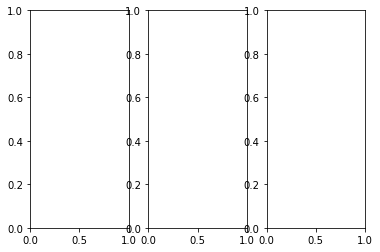

In [6]:
# plot the solution
directory = "/home/rk/ats_rk/testing/ats-demos/rk_model/Demofiles_outputs/hillslope_final_multilayer_case1.demo"
#
# plot the solution
#
def plot(dirname, axs):
    """A generic plotting function that plots saturation as a function of depth."""

    plot_column_data.plot_subsurface(vis, ['pressure',], axs[0], cmap='jet')
    axs[0].set_xlabel('pressure [Pa]')
    ax.set_ylabel('z [m]')
    
    plot_column_data.plot_subsurface(vis, ['saturation_liquid',], axs[1], None, cmap='jet')
    axs[0].set_xlabel('saturation [-]')
    ax.set_ylabel('z [m]')

def plot(directory, axs, style):
    # load the data
    vis = ats_xdmf.VisFile(directory, time_unit='d')
    vis.loadMesh(columnar=True)
    dati = np.array([vis.getArray(v) for v in ["pressure", "pressure", "saturation_liquid", 
                                    "saturation_ice", "saturation_gas", "temperature"]])
    times = vis.times
    
    ice = colors.cm_mapper(-10, times[-1], colors.ice_cmap())
    water = colors.cm_mapper(-10, times[-1], colors.water_cmap())
    gas = colors.cm_mapper(-10, times[-1], colors.gas_cmap())    
    
    # plot saturation of liquid, pressure
    z = vis.centroids[:,2]
    for i,t in enumerate(times):
        label = False
        if i == len(times)-1:
            axs[0].plot(dati[2,i,:],z, style, color=water(t), label='liquid')
            axs[0].plot(dati[3,i,:],z, style, color=ice(t), label='ice')
            axs[0].plot(dati[4,i,:],z, style, color=gas(t), label='gas')
        else:
            axs[0].plot(dati[2,i,:],z, style, color=water(t))
            axs[0].plot(dati[3,i,:],z, style, color=ice(t))
            axs[0].plot(dati[4,i,:],z, style, color=gas(t))
        axs[2].plot(dati[5,i,:],z, style, color=gas(t))
        axs[1].plot(dati[1,i,:],z, style, color=water(t))
        axs[0].plot(dati[2,i,:],z, style, color=water(t))
        axs[0].plot(dati[3,i,:],z, style, color=ice(t))
        axs[0].plot(dati[4,i,:],z, style, color=gas(t))

def decorate(axs):
    axs[0].set_xlabel('saturation [-]')
    axs[0].set_ylabel('z-coordinate [m]')
    axs[1].set_xlabel('pressure [Pa]')
    axs[2].set_xlabel('temperature [K]')
    axs[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    axs[0].set_xlim([-.1,1.1])
    axs[0].legend()


# full column
fig, axs = plt.subplots(1,3)
plot(directory, axs, '-')
decorate(axs)

# and a zoomed version
fig, axs = plt.subplots(1,3)
plot(directory, axs, '-')
decorate(axs)
axs[0].set_ylim([4.5,5])
axs[1].set_ylim([4.5,5])
axs[2].set_ylim([4.5,5])


plt.show()
            

In [7]:
file_name = '/home/rk/ats_rk/testing/ats-demos/rk_model/Demofiles_outputs/hillslope_final_multilayer_case1.demo'
input_filename = '/home/rk/ats_rk/testing/ats-demos/rk_model/Xml_input/hillslope_final_multilayer_case1.xml'

In [8]:
# load the ATS solution
directory = f"{file_name}"
vis = ats_xdmf.VisFile(directory)
vis.loadMesh(columnar=True)

### RK - work

In [9]:
### Extracting the subsurface data
with h5py.File(f'{file_name}/ats_vis_data.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    porosity = hdf.get('base_porosity.cell.0')
    print(porosity)

List of datasets in this file: 
 
 ['base_porosity.cell.0', 'capillary_pressure_gas_liq.cell.0', 'capillary_pressure_liq_ice.cell.0', 'cell_volume.cell.0', 'darcy_velocity.cell.0', 'darcy_velocity.cell.1', 'darcy_velocity.cell.2', 'density_rock.cell.0', 'dwater_content|dtemperature.cell.0', 'energy.cell.0', 'enthalpy.cell.0', 'enthalpy_times_relative_permeability.cell.0', 'internal_energy_ice.cell.0', 'internal_energy_liquid.cell.0', 'internal_energy_rock.cell.0', 'mass_density_liquid.cell.0', 'molar_density_ice.cell.0', 'molar_density_liquid.cell.0', 'permeability.cell.0', 'porosity.cell.0', 'pressure.cell.0', 'relative_permeability.cell.0', 'saturation_gas.cell.0', 'saturation_ice.cell.0', 'saturation_liquid.cell.0', 'temperature.cell.0', 'thermal_conductivity.cell.0', 'viscosity_liquid.cell.0', 'water_content.cell.0']


<HDF5 group "/base_porosity.cell.0" (11 members)>


### Recreating the node information of the cells:
- The centroidal distance was calculated while generating the ats mesh - ../ats/tools/meshing_ats_rk/hillslope_example_new.ipynb

In [10]:
# Inserting a '0' at the 0th position (to find rolling mean later)
#layerDepth = np.insert(layer_depth,0,0)
# To find the rolling mean:
# https://stackoverflow.com/questions/14313510/how-to-calculate-rolling-moving-average-using-numpy-scipy
#def moving_average(x, w):
    #return np.convolve(x, np.ones(w), 'valid') / w

#layer_depth_center = moving_average(layer_depth_center,2)
#print(layer_depth_center)

In [11]:
dz_hillslope = pd.read_csv('/home/rk/ats_rk/testing/ats-demos/rk_model/Data/layerdepthcentroid_hillslope.csv')
dz = dz_hillslope['layer_depth']
len(dz)

27

In [15]:
# The following data 'layerdepthcentroid_hillslope.csv' was extracted from the meshing files
dz_hillslope = pd.read_csv('/home/rk/ats_rk/testing/ats-demos/rk_model/Data/layerdepthcentroid_hillslope.csv')
z = dz_hillslope['layer_depth']


# Adding a bunch of cells to reach 45 m with 40 cells

dz = 1.4
i = len(z)
total_depth = z[26]
while total_depth < 45:
    z[i] = z[i - 1] + dz
    total_depth += dz
    i += 1
z = -z
z.head() 


0   -0.006000
1   -0.019200
2   -0.035040
3   -0.054048
4   -0.076858
Name: layer_depth, dtype: float64

### Hillslope case: 
- It is a 2-D transect with 40 cells along the vertical and 100 cells along the horizontal
- The data is stored based on the cell number starting from the Left to the Right (Left - higher elevation)
- We need to write the code such that all the data for a single variable is stored in a dataframe.
- Repeating the same depths along the row a 100 times will provide a numpy array with (4000,1) shape. 

In [57]:
def inputfiles_pddataframes(file_name,t):
    """
    The function is defined to read the input files from the ats simulation. 
    For each time instance, a dataframe can store the data.
 
    Parameters
    ------
    
    Input parameters:
    
    file_name : Provide the path to access the file name. 
    Ex: 'richards_steadystate.demo/ats_vis_data.h5'
    
    t : The time instance at which the data is required.
    Ex: cell_volume.cell.0/{t} - here 0/0 - signifies the first directory (with data at t=0), 
    similarly 0/1 - signifies the second directory (with data at t=1).
            
    Output parameters:
    
    data_results : pandas dataframe with all the key elements of the simulation.
    
    - idea - can't we write a smart function that directly accesses all the columns? - !
    
    """
    # The following data 'layerdepthcentroid_hillslope.csv' was extracted from the meshing files
    dz_hillslope = pd.read_csv('/home/rk/ats_rk/testing/ats-demos/rk_model/Data/layerdepthcentroid_hillslope.csv')
    z = dz_hillslope['layer_depth']

    # Adding a bunch of cells to reach 45 m with 40 cells
    dz = 1.4
    i = len(z)
    total_depth = z[26]
    while total_depth < 45:
        z[i] = z[i - 1] + dz
        total_depth += dz
        i += 1
    # Taking the negative values since we are going below the surface
    z = -z
    
    # It is a 2-D transect with 40 cells along the vertical and 100 cells along the horizontal
    # The data is stored based on the cell number starting from the Left to the Right (Left - higher elevation)
    # We need to write the code such that all the data for a single variable is stored in a dataframe.
    # Repeating the same depths along the row a 100 times will provide a numpy array with (4000,1) shape. 
    
    # Introducing a new variable for the hillslope - z_transect!
    z_transect = z.copy()
    # Storing the depth values 99 more times:
    for i in range(99):
        z_transect = z_transect.append(z)
    #print(i)
    
    z_transect.index = np.arange(1,4001,1)
    
    with h5py.File(file_name,'r') as hdf:
        # Cell_volume
        cell_volume_all = np.array(hdf.get(f'cell_volume.cell.0/{t}'))
        cell_volume = cell_volume_all.flatten()
        
        
        # Storing the variables/constants in a dataframe - Do we have a direct function to do this? 
        # Can we simplify the code?
        
        data_results = pd.DataFrame(index=z_transect,data=cell_volume,columns=['cell_volume'])

        mass_density_all = np.array(hdf.get(f'mass_density_liquid.cell.0/{t}'))
        mass_density = mass_density_all.flatten()
        data_results['mass_density [rho_l] [kg m^{-3}]'] = mass_density



        molar_density_all = np.array(hdf.get(f'molar_density_liquid.cell.0/{t}'))
        molar_density = molar_density_all.flatten()
        data_results['molar_density [n_l] [mol m^{-3}]'] = molar_density


        permeability_all = np.array(hdf.get(f'permeability.cell.0/{t}'))
        permeability = permeability_all.flatten()
        data_results['Absolute permeability [K] (m^{2})'] = permeability



        porosity_all = np.array(hdf.get(f'porosity.cell.0/{t}'))
        porosity = porosity_all.flatten()
        data_results['Porosity [phi] (-)'] = porosity

        pressure_all = np.array(hdf.get(f'pressure.cell.0/{t}'))
        pressure = pressure_all.flatten()
        data_results['Abs pressure [p_abs] [Pa]'] = pressure 
        # Water pressure or total pressure (Atm + water)? - Probably both

        relative_permeability_all = np.array(hdf.get(f'relative_permeability.cell.0/{t}'))
        relative_permeability = relative_permeability_all.flatten()
        data_results['Relative permeability [kr] [-]'] = relative_permeability


        saturation_gas_all = np.array(hdf.get(f'saturation_gas.cell.0/{t}'))
        saturation_gas = saturation_gas_all.flatten()
        data_results['Saturation of gas [s_g] [-]'] = saturation_gas


        saturation_liquid_all = np.array(hdf.get(f'saturation_liquid.cell.0/{t}'))
        saturation_liquid = saturation_liquid_all.flatten()
        data_results['Saturation of liquid [s_l] [-]'] = saturation_liquid


        
        saturation_ice_all = np.array(hdf.get(f'saturation_ice.cell.0/{t}'))
        saturation_ice = saturation_ice_all.flatten()
        data_results['Saturation of ice [s_i] [-]'] = saturation_ice
        
        temperature_all = np.array(hdf.get(f'temperature.cell.0/{t}'))
        temperature = temperature_all.flatten()
        data_results['Temperature [T] [K]'] = temperature


        viscosity_liquid_all = np.array(hdf.get(f'viscosity_liquid.cell.0/{t}'))
        viscosity_liquid = viscosity_liquid_all.flatten()
        data_results['viscosity_liquid [v] Pas]'] = viscosity_liquid


        water_content_all = np.array(hdf.get(f'water_content.cell.0/{t}'))
        water_content = water_content_all.flatten()
        data_results['water_content [theta] mols'] = water_content
        
        
        # Inserting the 'layer_depth' index as a column
        data_results.insert(0,'layer_depth',data_results.index)
        # Changing the index based on the cell number
        data_results.index = np.arange(1,4001,1)
        
        return data_results

In [58]:
# Determining the time instances at which the data is stored

with h5py.File(f'{file_name}/ats_vis_data.h5','r') as hdf:
        # Cell_volume
        cell_volume_all = np.array(hdf.get(f'cell_volume.cell.0'))
        time_period = cell_volume_all.astype('int64')
        print(time_period)
        # Time series stored in an irregular format! - 
        # ['0' '100' '103' '104' '105' '106' '107' '108' '109' '110' '111']

[ 0 12 13 14 15 16 17 18 19 20 21]


### Storing the data for all time instances

In [59]:
for i in time_period:
    # https://stackoverflow.com/questions/1060090/changing-variable-names-with-python-for-loops
    locals()["data_results_"+str(i)] = inputfiles_pddataframes(file_name=f'{file_name}/ats_vis_data.h5', t=i)

### Plotting the initial pressure:

In [60]:
data_results_0.head()

,layer_depth,cell_volume,mass_density [rho_l] [kg m^{-3}],molar_density [n_l] [mol m^{-3}],Absolute permeability [K] (m^{2}),Porosity [phi] (-),Abs pressure [p_abs] [Pa],Relative permeability [kr] [-],Saturation of gas [s_g] [-],Saturation of liquid [s_l] [-],Saturation of ice [s_i] [-],Temperature [T] [K],viscosity_liquid [v] Pas],water_content [theta] mols
1,-0.006000,0.120000,999.933993,55504.709505,5.000000e-11,0.85,-6489.310100,0.000002,0.749597,0.250403,0.0,273.65,0.001753,1417.653913
2,-0.019200,0.144000,999.933993,55504.709505,5.000000e-11,0.85,-6359.862320,0.000002,0.749503,0.250497,0.0,273.65,0.001753,1701.820263
3,-0.035040,0.172800,999.933993,55504.709505,5.000000e-11,0.85,-6204.524984,0.000002,0.749391,0.250609,0.0,273.65,0.001753,2043.101209
4,-0.054048,0.207360,999.933993,55504.709505,5.000000e-11,0.85,-6018.120181,0.000002,0.749255,0.250745,0.0,273.65,0.001753,2453.044682
5,-0.076858,0.248832,999.933993,55504.709505,5.000000e-11,0.85,-5794.434417,0.000002,0.749093,0.250907,0.0,273.65,0.001753,2945.564113


In [61]:
data_results_0['Abs pressure [p_abs] [Pa]'].head()

1   -6489.310100
2   -6359.862320
3   -6204.524984
4   -6018.120181
5   -5794.434417
Name: Abs pressure [p_abs] [Pa], dtype: float64

In [62]:
rho_avg = 1000 # kg m^{-3} - Provided by the developer 
g = 9.8006 # ms^{-2} - Provided by the user, g = (0,0,-9.8006m ms^{-2})
p_0 = 101325 # Pa

# Calculating the water pressure = p_abs -p_0
data_results_0['Water pressure [p_l] [Pa]'] = data_results_0['Abs pressure [p_abs] [Pa]'] - p_0

data_results_0['Pressure head [m]'] = data_results_0['Water pressure [p_l] [Pa]']/(rho_avg*g)

data_results_0['Elevation head [m]'] = data_results_0.index

data_results_0['Hydraulic head [m]'] = data_results_0['Pressure head [m]'] + data_results_0['Elevation head [m]']

data_results_0['Atmospheric pressure head [m]'] = 101325/(rho_avg*g)

data_results_0.head()

,layer_depth,cell_volume,mass_density [rho_l] [kg m^{-3}],molar_density [n_l] [mol m^{-3}],Absolute permeability [K] (m^{2}),Porosity [phi] (-),Abs pressure [p_abs] [Pa],Relative permeability [kr] [-],Saturation of gas [s_g] [-],Saturation of liquid [s_l] [-],Saturation of ice [s_i] [-],Temperature [T] [K],viscosity_liquid [v] Pas],water_content [theta] mols,Water pressure [p_l] [Pa],Pressure head [m],Elevation head [m],Hydraulic head [m],Atmospheric pressure head [m]
1,-0.006000,0.120000,999.933993,55504.709505,5.000000e-11,0.85,-6489.310100,0.000002,0.749597,0.250403,0.0,273.65,0.001753,1417.653913,-107814.310100,-11.000787,1,-10.000787,10.338653
2,-0.019200,0.144000,999.933993,55504.709505,5.000000e-11,0.85,-6359.862320,0.000002,0.749503,0.250497,0.0,273.65,0.001753,1701.820263,-107684.862320,-10.987579,2,-8.987579,10.338653
3,-0.035040,0.172800,999.933993,55504.709505,5.000000e-11,0.85,-6204.524984,0.000002,0.749391,0.250609,0.0,273.65,0.001753,2043.101209,-107529.524984,-10.971729,3,-7.971729,10.338653
4,-0.054048,0.207360,999.933993,55504.709505,5.000000e-11,0.85,-6018.120181,0.000002,0.749255,0.250745,0.0,273.65,0.001753,2453.044682,-107343.120181,-10.952709,4,-6.952709,10.338653
5,-0.076858,0.248832,999.933993,55504.709505,5.000000e-11,0.85,-5794.434417,0.000002,0.749093,0.250907,0.0,273.65,0.001753,2945.564113,-107119.434417,-10.929885,5,-5.929885,10.338653


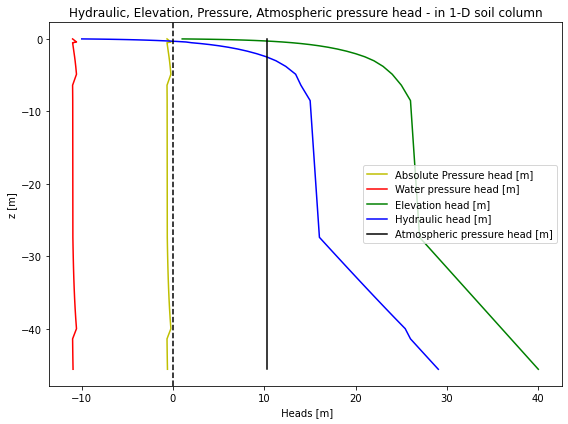

In [71]:
# To find the elevation where -ve pressure head begins
#z_drop = data_results_0[data_results_0['Pressure head [m]'].le(0)].index[0]

z = data_results_0['layer_depth'][0:40]

fig = plt.figure(figsize=(8,6))

plt.title('Hydraulic, Elevation, Pressure, Atmospheric pressure head - in 1-D soil column')
plt.plot(data_results_0['Abs pressure [p_abs] [Pa]'][0:40]/(rho_avg*g), z, 'y', label='Absolute Pressure head [m]')
plt.plot(data_results_0['Pressure head [m]'][0:40], z, 'r', label='Water pressure head [m]')
plt.plot(data_results_0['Elevation head [m]'][0:40], z, 'g', label='Elevation head [m]')
plt.plot(data_results_0['Hydraulic head [m]'][0:40], z, 'b', label='Hydraulic head [m]')
plt.plot(data_results_0['Atmospheric pressure head [m]'][0:40], z, 'k', label='Atmospheric pressure head [m]')
plt.axvline(x=0,color='k',linestyle='--')
plt.ylabel('z [m]')
plt.xlabel(' Heads [m]')
plt.legend()
plt.tight_layout()
plt.show()

In [74]:
data_results_0.columns

Index(['layer_depth', 'cell_volume', 'mass_density [rho_l] [kg m^{-3}]',
       'molar_density [n_l] [mol m^{-3}]', 'Absolute permeability [K] (m^{2})',
       'Porosity [phi] (-)', 'Abs pressure [p_abs] [Pa]',
       'Relative permeability [kr] [-]', 'Saturation of gas [s_g] [-]',
       'Saturation of liquid [s_l] [-]', 'Saturation of ice [s_i] [-]',
       'Temperature [T] [K]', 'viscosity_liquid [v] Pas]',
       'water_content [theta] mols', 'Water pressure [p_l] [Pa]',
       'Pressure head [m]', 'Elevation head [m]', 'Hydraulic head [m]',
       'Atmospheric pressure head [m]'],
      dtype='object')

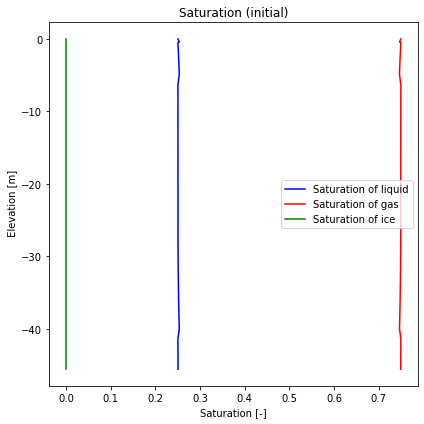

In [76]:
fig = plt.figure(figsize=(6,6))

plt.title('Saturation (initial)')
plt.plot(data_results_0['Saturation of liquid [s_l] [-]'][0:40], z, 'b', label='Saturation of liquid')
plt.plot(data_results_0['Saturation of gas [s_g] [-]'][0:40], z, 'r', label='Saturation of gas')
plt.plot(data_results_0['Saturation of ice [s_i] [-]'][0:40], z, 'g', label='Saturation of ice')

plt.xlabel('Saturation [-]')
plt.ylabel(' Elevation [m]')
plt.tight_layout()
plt.legend()
#plt.show()

In [52]:
data_results_0.columns

Index(['cell_volume', 'mass_density [rho_l] [kg m^{-3}]',
       'molar_density [n_l] [mol m^{-3}]', 'Absolute permeability [K] (m^{2})',
       'Porosity [phi] (-)', 'Abs pressure [p_abs] [Pa]',
       'Relative permeability [kr] [-]', 'Saturation of gas [s_g] [-]',
       'Saturation of liquid [s_l] [-]', 'Saturation of ice [s_i] [-]',
       'Temperature [T] [K]', 'viscosity_liquid [v] Pas]',
       'water_content [theta] mols', 'Water pressure [p_l] [Pa]',
       'Pressure head [m]', 'Elevation head [m]', 'Hydraulic head [m]',
       'Atmospheric pressure head [m]'],
      dtype='object')

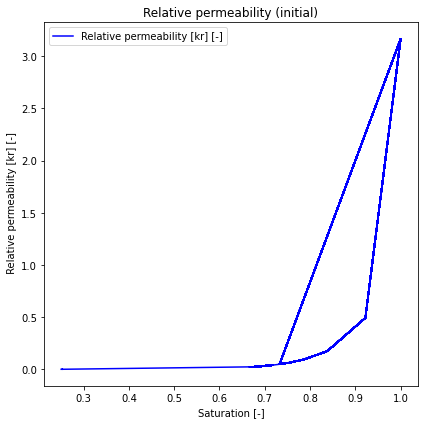

In [77]:
fig = plt.figure(figsize=(6,6))

plt.title('Relative permeability (initial)')
plt.plot(data_results_0['Saturation of liquid [s_l] [-]'],data_results_0['Relative permeability [kr] [-]'], 'b', label='Relative permeability [kr] [-]')

plt.xlabel('Saturation [-]')
plt.ylabel(' Relative permeability [kr] [-]')
plt.tight_layout()
plt.legend()
#plt.show()

In [78]:
with h5py.File(f'{file_name}/ats_vis_data.h5','r') as hdf:
        # Cell_volume
        cell_volume_all = np.array(hdf.get(f'cell_volume.cell.0'))
        time_period = cell_volume_all.astype('int64')
        ### Sorting the dataframes 
        time_period.sort()
        print(time_period)

[ 0 12 13 14 15 16 17 18 19 20 21]


In [79]:
len(time_period)

11

In [80]:
time_period[1:]

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21])

### Defining a dataframe that extracts the data for a single variable for all time instances

In [90]:
def input_datavar(file_name, variable):
    """
    The function defined to extract a variable across all time instances.
    
    Parameters
    ------
    
    Input parameters:
    
    file_name : Provide the path to access the file name. 
    Ex: 'richards_steadystate.demo/ats_vis_data.h5'
    
    variable: Name of the variable in the dataset that you are interested in.
    Ex: 'cell_volume'
    
    Output parameters:
    
    data_var : pandas dataframe with the time series data of the variable.
    
    """
    
    # Storing the dz coordinates
    ### Finding the average between two rows - to find centroidal distance

    # The following data 'layerdepthcentroid_hillslope.csv' was extracted from the meshing files
    dz_hillslope = pd.read_csv('/home/rk/ats_rk/testing/ats-demos/rk_model/Data/layerdepthcentroid_hillslope.csv')
    z = dz_hillslope['layer_depth']

    # Adding a bunch of cells to reach 45 m with 40 cells
    dz = 1.4
    i = len(z)
    total_depth = z[26]
    while total_depth < 45:
        z[i] = z[i - 1] + dz
        total_depth += dz
        i += 1
    # Taking the negative values since we are going below the surface
    z = -z
    
    # It is a 2-D transect with 40 cells along the vertical and 100 cells along the horizontal
    # The data is stored based on the cell number starting from the Left to the Right (Left - higher elevation)
    # We need to write the code such that all the data for a single variable is stored in a dataframe.
    # Repeating the same depths along the row a 100 times will provide a numpy array with (4000,1) shape. 
    
    # Introducing a new variable for the hillslope - z_transect!
    z_transect = z.copy()
    # Storing the depth values 99 more times:
    for i in range(99):
        z_transect = z_transect.append(z)
    #print(i)
    
    z_transect.index = np.arange(1,4001,1)
    
    
    # To determine the time period and the list in which the dataframes 
    
    with h5py.File(f'{file_name}/ats_vis_data.h5','r') as hdf:
        # Cell_volume
        cell_volume_all = np.array(hdf.get(f'cell_volume.cell.0'))
        time_period = cell_volume_all.astype('int64')
        ### Sorting the dataframes 
        time_period.sort()
    
    with h5py.File(f'{file_name}/ats_vis_data.h5','r') as hdf:
        # Cell_volume
        var_all_0 = np.array(hdf.get(f'{variable}.cell.0/0'))
        var_0 = var_all_0.flatten()
        data_var = pd.DataFrame(index=z_transect,data=var_0,columns=[f'0'])
        
        for i in time_period[1:]:
            var_all = np.array(hdf.get(f'{variable}.cell.0/{i}'))
            var = var_all.flatten()
            
            data_var[f'{i}'] = var
    
    # Inserting the 'layer_depth' index as a column
    data_var.insert(0,'layer_depth',data_var.index)
    # Changing the index based on the cell number
    data_var.index = np.arange(1,4001,1)
        
        
    return data_var

In [91]:
with h5py.File(f'{file_name}/ats_vis_data.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    porosity = hdf.get('saturation_liquid.cell.0/100')
    print(porosity)

List of datasets in this file: 
 
 ['base_porosity.cell.0', 'capillary_pressure_gas_liq.cell.0', 'capillary_pressure_liq_ice.cell.0', 'cell_volume.cell.0', 'darcy_velocity.cell.0', 'darcy_velocity.cell.1', 'darcy_velocity.cell.2', 'density_rock.cell.0', 'dwater_content|dtemperature.cell.0', 'energy.cell.0', 'enthalpy.cell.0', 'enthalpy_times_relative_permeability.cell.0', 'internal_energy_ice.cell.0', 'internal_energy_liquid.cell.0', 'internal_energy_rock.cell.0', 'mass_density_liquid.cell.0', 'molar_density_ice.cell.0', 'molar_density_liquid.cell.0', 'permeability.cell.0', 'porosity.cell.0', 'pressure.cell.0', 'relative_permeability.cell.0', 'saturation_gas.cell.0', 'saturation_ice.cell.0', 'saturation_liquid.cell.0', 'temperature.cell.0', 'thermal_conductivity.cell.0', 'viscosity_liquid.cell.0', 'water_content.cell.0']


None


In [92]:
### Accessing the variable at all time instances

### Add or remove variable name if required
variables = ['saturation_liquid','saturation_ice','saturation_gas','pressure','relative_permeability','temperature']

for i in variables:
    locals()["df_"+str(i)] = input_datavar(file_name, i)
    len_rows = len(locals()["df_"+str(i)].columns)
    locals()["df_"+str(i)].columns = np.arange(0,len_rows,1)

In [93]:
df_pressure.head()

,0,1,2,3,4,5,6,7,8,9,10,11
1,-0.006000,-6489.310100,-6133.179900,-6135.970796,-6140.925726,-6146.837644,-6152.909273,-6158.666317,-6163.855565,-6168.361427,-6172.150031,-6175.234842
2,-0.019200,-6359.862320,-6004.663974,-6007.032584,-6011.953281,-6017.863449,-6023.924587,-6029.660700,-6034.822535,-6039.298094,-6043.055952,-6046.111084
3,-0.035040,-6204.524984,-5853.784153,-5853.417576,-5857.856168,-5863.625891,-5869.600540,-5875.251997,-5880.325000,-5884.710419,-5888.380336,-5891.352294
4,-0.054048,-6018.120181,-5679.945993,-5671.722114,-5674.391310,-5679.572016,-5685.235230,-5690.647340,-5695.503757,-5699.685451,-5703.164357,-5705.959630
5,-0.076858,-5794.434417,-5482.343053,-5458.708697,-5457.041450,-5460.616231,-5465.452648,-5470.294690,-5474.683442,-5478.452301,-5481.558604,-5484.017117


In [94]:
pressure_head_data = df_pressure/(10000)

In [95]:
pressure_head_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
1,-6.000000e-07,-0.648931,-0.613318,-0.613597,-0.614093,-0.614684,-0.615291,-0.615867,-0.616386,-0.616836,-0.617215,-0.617523
2,-1.920000e-06,-0.635986,-0.600466,-0.600703,-0.601195,-0.601786,-0.602392,-0.602966,-0.603482,-0.603930,-0.604306,-0.604611
3,-3.504000e-06,-0.620452,-0.585378,-0.585342,-0.585786,-0.586363,-0.586960,-0.587525,-0.588032,-0.588471,-0.588838,-0.589135
4,-5.404800e-06,-0.601812,-0.567995,-0.567172,-0.567439,-0.567957,-0.568524,-0.569065,-0.569550,-0.569969,-0.570316,-0.570596
5,-7.685760e-06,-0.579443,-0.548234,-0.545871,-0.545704,-0.546062,-0.546545,-0.547029,-0.547468,-0.547845,-0.548156,-0.548402


In [101]:
data_results_0['layer_depth'][0:40]

1     -0.006000
2     -0.019200
3     -0.035040
4     -0.054048
5     -0.076858
6     -0.104229
7     -0.137075
8     -0.176490
9     -0.223788
10    -0.280546
11    -0.348655
12    -0.430386
13    -0.528463
14    -0.646155
15    -0.787386
16    -0.956863
17    -1.160236
18    -1.404283
19    -1.697140
20    -2.048568
21    -2.470282
22    -3.022343
23    -3.795229
24    -4.877269
25    -6.392126
26    -8.512925
27   -27.375029
28   -28.775029
29   -30.175029
30   -31.575029
31   -32.975029
32   -34.375029
33   -35.775029
34   -37.175029
35   -38.575029
36   -39.975029
37   -41.375029
38   -42.775029
39   -44.175029
40   -45.575029
Name: layer_depth, dtype: float64

In [102]:
df_saturation_liquid[0][0:40]

1     -0.006000
2     -0.019200
3     -0.035040
4     -0.054048
5     -0.076858
6     -0.104229
7     -0.137075
8     -0.176490
9     -0.223788
10    -0.280546
11    -0.348655
12    -0.430386
13    -0.528463
14    -0.646155
15    -0.787386
16    -0.956863
17    -1.160236
18    -1.404283
19    -1.697140
20    -2.048568
21    -2.470282
22    -3.022343
23    -3.795229
24    -4.877269
25    -6.392126
26    -8.512925
27   -27.375029
28   -28.775029
29   -30.175029
30   -31.575029
31   -32.975029
32   -34.375029
33   -35.775029
34   -37.175029
35   -38.575029
36   -39.975029
37   -41.375029
38   -42.775029
39   -44.175029
40   -45.575029
Name: 0, dtype: float64

Text(0.5, 0, 'Saturation (-)')

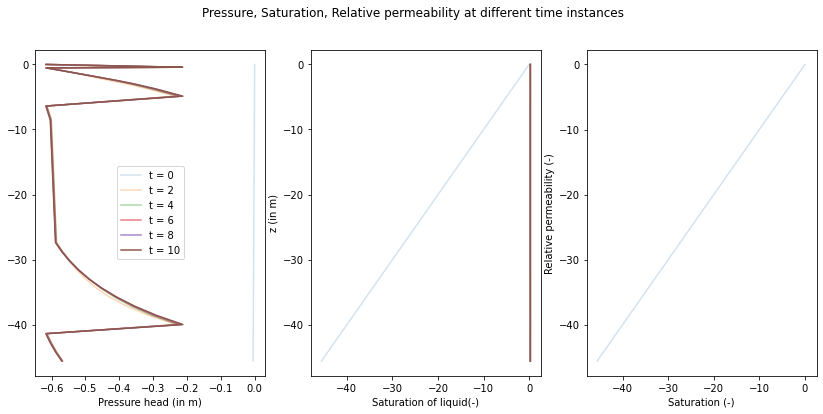

In [103]:
fig, (ax2, ax1, ax3) = plt.subplots(1, 3)
fig.set_size_inches(w=14,h=6)
fig.suptitle('Pressure, Saturation, Relative permeability at different time instances')

z = data_results_0['layer_depth'][0:40]

ax1.plot(df_saturation_liquid[0][0:40], z, alpha=0.2)
ax1.plot(df_saturation_liquid[2][0:40], z, alpha=0.3)
ax1.plot(df_saturation_liquid[4][0:40], z, alpha=0.5)
ax1.plot(df_saturation_liquid[6][0:40], z, alpha=0.6)
ax1.plot(df_saturation_liquid[8][0:40], z, alpha=0.8)
ax1.plot(df_saturation_liquid[10][0:40], z, alpha=1)
#ax1.plot(df_saturation_liquid[200], z, alpha=1)
#ax1.legend()
ax1.set_ylabel('z (in m)')
ax1.set_xlabel('Saturation of liquid(-)')

ax2.plot(pressure_head_data[0][0:40], z, alpha=0.2, label ='t = 0')
ax2.plot(pressure_head_data[2][0:40], z, alpha=0.3, label ='t = 2')
ax2.plot(pressure_head_data[4][0:40], z, alpha=0.4, label ='t = 4')
ax2.plot(pressure_head_data[6][0:40], z, alpha=0.6, label ='t = 6')
ax2.plot(pressure_head_data[8][0:40], z, alpha=0.8, label ='t = 8')
ax2.plot(pressure_head_data[10][0:40], z, alpha=1, label ='t = 10')
#ax2.plot(pressure_head_data[200], z, alpha=1)
ax2.set_xlabel('Pressure head (in m)')
ax2.legend()

ax3.plot(df_saturation_liquid[0][0:40], df_relative_permeability[0][0:40], alpha=0.2)
ax3.plot(df_saturation_liquid[2][0:40], df_relative_permeability[2][0:40], alpha=0.3)
ax3.plot(df_saturation_liquid[4][0:40], df_relative_permeability[4][0:40], alpha=0.4)
ax3.plot(df_saturation_liquid[6][0:40], df_relative_permeability[6][0:40], alpha=0.6)
ax3.plot(df_saturation_liquid[8][0:40], df_relative_permeability[8][0:40], alpha=0.8)
ax3.plot(df_saturation_liquid[10][0:40], df_relative_permeability[10][0:40], alpha=1)
#ax3.plot(df_saturation_liquid[200], df_relative_permeability[200], alpha=1, label ='t = 2 days')
#ax3.legend()
ax3.set_ylabel('Relative permeability (-)')
ax3.set_xlabel('Saturation (-)')


Text(0.5, 0, 'Saturation (-)')

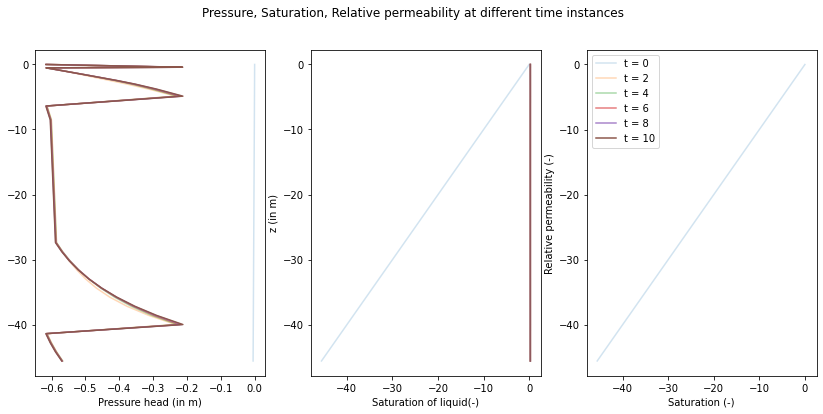

In [107]:
fig, (ax2, ax1, ax3) = plt.subplots(1, 3)
fig.set_size_inches(w=14,h=6)
fig.suptitle('Pressure, Saturation, Relative permeability at different time instances')

z = data_results_0['layer_depth'][0:40]

ax1.plot(df_saturation_liquid[0][0:40], z, alpha=0.2)
ax1.plot(df_saturation_liquid[2][0:40], z, alpha=0.3)
ax1.plot(df_saturation_liquid[4][0:40], z, alpha=0.5)
ax1.plot(df_saturation_liquid[6][0:40], z, alpha=0.6)
ax1.plot(df_saturation_liquid[8][0:40], z, alpha=0.8)
ax1.plot(df_saturation_liquid[10][0:40], z, alpha=0.8)
#ax1.plot(df_saturation_liquid[200], z, alpha=1)
#ax1.legend()
ax1.set_ylabel('z (in m)')
ax1.set_xlabel('Saturation of liquid(-)')

ax2.plot(pressure_head_data[0][0:40], z, alpha=0.2)
ax2.plot(pressure_head_data[2][0:40], z, alpha=0.3)
ax2.plot(pressure_head_data[4][0:40], z, alpha=0.4)
ax2.plot(pressure_head_data[6][0:40], z, alpha=0.6)
ax2.plot(pressure_head_data[8][0:40], z, alpha=0.8)
ax2.plot(pressure_head_data[10][0:40], z, alpha=1.0)
#ax2.plot(pressure_head_data[19], z, alpha=1)
#ax2.plot(pressure_head_data[200], z, alpha=1)
ax2.set_xlabel('Pressure head (in m)')
#ax2.legend()

ax3.plot(df_saturation_liquid[0][0:40], df_relative_permeability[0][0:40], alpha=0.2, label ='t = 0')
ax3.plot(df_saturation_liquid[2][0:40], df_relative_permeability[2][0:40], alpha=0.3, label ='t = 2')
ax3.plot(df_saturation_liquid[4][0:40], df_relative_permeability[4][0:40], alpha=0.4, label ='t = 4')
ax3.plot(df_saturation_liquid[6][0:40], df_relative_permeability[6][0:40], alpha=0.6, label ='t = 6')
ax3.plot(df_saturation_liquid[8][0:40], df_relative_permeability[8][0:40], alpha=0.8, label ='t = 8')
ax3.plot(df_saturation_liquid[10][0:40], df_relative_permeability[10][0:40], alpha=1.0, label ='t = 10')
#ax3.plot(df_saturation_liquid[19], df_relative_permeability[10], alpha=1, label ='t = 20')
#ax3.plot(df_saturation_liquid[200], df_relative_permeability[200], alpha=1, label ='t = 2 days')
ax3.legend()
ax3.set_ylabel('Relative permeability (-)')
ax3.set_xlabel('Saturation (-)')

Text(0.5, 0, 'Temperature (K)')

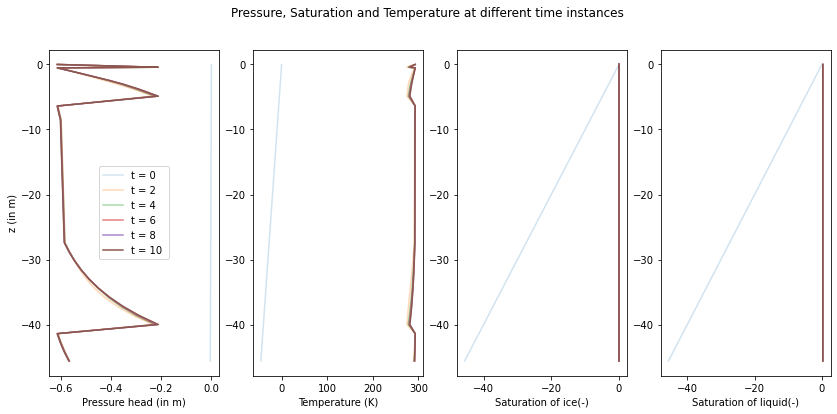

In [109]:
fig, (ax2, ax4, ax3,ax1) = plt.subplots(1, 4)
fig.set_size_inches(w=14,h=6)
fig.suptitle('Pressure, Saturation and Temperature at different time instances')

z = data_results_0['layer_depth'][0:40]

#df_saturation_liquid = df_saturation_liquid.iloc[::-1]

ax1.plot(df_saturation_liquid[0][0:40], z, alpha=0.2)
ax1.plot(df_saturation_liquid[2][0:40], z, alpha=0.3)
ax1.plot(df_saturation_liquid[4][0:40], z, alpha=0.5)
ax1.plot(df_saturation_liquid[6][0:40], z, alpha=0.6)
ax1.plot(df_saturation_liquid[8][0:40], z, alpha=0.8)
ax1.plot(df_saturation_liquid[10][0:40], z, alpha=1.0)
#ax1.plot(df_saturation_liquid[19], z, alpha=1)
#ax1.plot(df_saturation_liquid[200], z, alpha=1)
#ax1.legend()

ax1.set_xlabel('Saturation of liquid(-)')

ax2.plot(pressure_head_data[0][0:40], z, alpha=0.2, label ='t = 0')
ax2.plot(pressure_head_data[2][0:40], z, alpha=0.3, label ='t = 2 ')
ax2.plot(pressure_head_data[4][0:40], z, alpha=0.4, label ='t = 4 ')
ax2.plot(pressure_head_data[6][0:40], z, alpha=0.6, label ='t = 6 ')
ax2.plot(pressure_head_data[8][0:40], z, alpha=0.8, label ='t = 8 ')
ax2.plot(pressure_head_data[10][0:40], z, alpha=1.0, label ='t = 10 ')
#ax2.plot(pressure_head_data[19], z, alpha=1, label ='t = 20 ')
#ax2.plot(pressure_head_data[200], z, alpha=1)
ax2.set_xlabel('Pressure head (in m)')
ax2.set_ylabel('z (in m)')
ax2.legend()

ax3.plot(df_saturation_ice[0][0:40], z, alpha=0.2)
ax3.plot(df_saturation_ice[2][0:40], z, alpha=0.3)
ax3.plot(df_saturation_ice[4][0:40], z, alpha=0.5)
ax3.plot(df_saturation_ice[6][0:40], z, alpha=0.6)
ax3.plot(df_saturation_ice[8][0:40], z, alpha=0.8)
ax3.plot(df_saturation_ice[10][0:40], z, alpha=1.0)
#ax3.plot(df_saturation_ice[19], z, alpha=1)
#ax1.plot(df_saturation_ice[200], z, alpha=1)
#ax1.legend()
#ax3.set_ylabel('z (in m)')
ax3.set_xlabel('Saturation of ice(-)')

ax4.plot(df_temperature[0][0:40], z, alpha=0.2)
ax4.plot(df_temperature[2][0:40], z, alpha=0.3)
ax4.plot(df_temperature[4][0:40], z, alpha=0.5)
ax4.plot(df_temperature[6][0:40], z, alpha=0.6)
ax4.plot(df_temperature[8][0:40], z, alpha=0.8)
ax4.plot(df_temperature[10][0:40], z, alpha=1.0)
#ax4.plot(df_temperature[19], z, alpha=1)
#ax1.plot(df_temperature[200], z, alpha=1)
#ax1.legend()
#ax4.set_ylabel('z (in m)')
ax4.set_xlabel('Temperature (K)')

* Q - Why does pressure increase to a large extent when liquid freezes to ice? - Density of ice and water are 0.9167–0.9168 g/cm3 and  0.9998–0.999863 g/cm3 - Change in temperature 
* https://courses.lumenlearning.com/cheminter/chapter/phase-diagram-for-water/ - Read this link!

### Plotting the changes near the surface

(-1.0, 0.0)

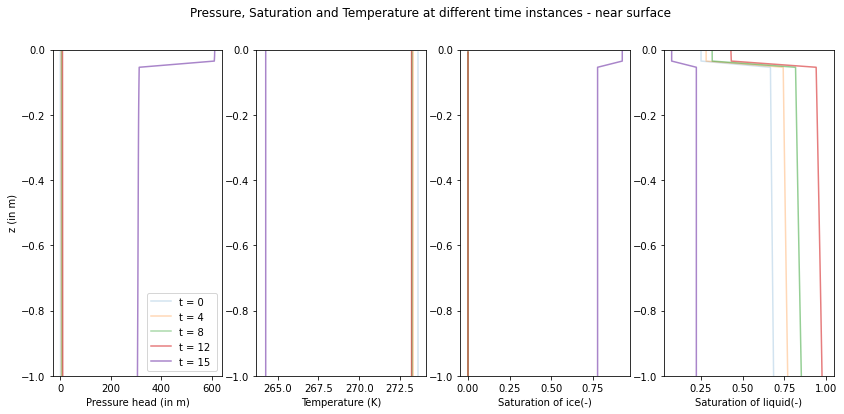

In [72]:
fig, (ax2, ax4, ax3,ax1) = plt.subplots(1, 4)
fig.set_size_inches(w=14,h=6)
fig.suptitle('Pressure, Saturation and Temperature at different time instances - near surface')

z = df_saturation_liquid.index

#df_saturation_liquid = df_saturation_liquid.iloc[::-1]

ax1.plot(df_saturation_liquid[0], z, alpha=0.2)
ax1.plot(df_saturation_liquid[4], z, alpha=0.3)
ax1.plot(df_saturation_liquid[8], z, alpha=0.5)
ax1.plot(df_saturation_liquid[12], z, alpha=0.6)
ax1.plot(df_saturation_liquid[15], z, alpha=0.8)
ax1.set_ylim(-1, 0)
#ax1.plot(df_saturation_liquid[19], z, alpha=1)
#ax1.plot(df_saturation_liquid[200], z, alpha=1)
#ax1.legend()

ax1.set_xlabel('Saturation of liquid(-)')

ax2.plot(pressure_head_data[0], z, alpha=0.2, label ='t = 0')
ax2.plot(pressure_head_data[4], z, alpha=0.3, label ='t = 4 ')
ax2.plot(pressure_head_data[8], z, alpha=0.4, label ='t = 8 ')
ax2.plot(pressure_head_data[12], z, alpha=0.6, label ='t = 12 ')
ax2.plot(pressure_head_data[15], z, alpha=0.8, label ='t = 15 ')
#ax2.plot(pressure_head_data[19], z, alpha=1, label ='t = 20 ')
#ax2.plot(pressure_head_data[200], z, alpha=1)
ax2.set_xlabel('Pressure head (in m)')
ax2.set_ylabel('z (in m)')
ax2.legend()
ax2.set_ylim(-1, 0)

ax3.plot(df_saturation_ice[0], z, alpha=0.2)
ax3.plot(df_saturation_ice[4], z, alpha=0.3)
ax3.plot(df_saturation_ice[8], z, alpha=0.5)
ax3.plot(df_saturation_ice[12], z, alpha=0.6)
ax3.plot(df_saturation_ice[15], z, alpha=0.8)
#ax3.plot(df_saturation_ice[19], z, alpha=1)
#ax1.plot(df_saturation_ice[200], z, alpha=1)
#ax1.legend()
#ax3.set_ylabel('z (in m)')
ax3.set_xlabel('Saturation of ice(-)')
ax3.set_ylim(-1, 0)

ax4.plot(df_temperature[0], z, alpha=0.2)
ax4.plot(df_temperature[4], z, alpha=0.3)
ax4.plot(df_temperature[8], z, alpha=0.5)
ax4.plot(df_temperature[12], z, alpha=0.6)
ax4.plot(df_temperature[15], z, alpha=0.8)
#ax4.plot(df_temperature[19], z, alpha=1)
#ax1.plot(df_temperature[200], z, alpha=1)
#ax1.legend()
#ax4.set_ylabel('z (in m)')
ax4.set_xlabel('Temperature (K)')
ax4.set_ylim(-1, 0)